In [1]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import segmentation_models_pytorch as smp

In [2]:
from levee_hunter.levees_dataset import LeveesDataset

dataset = LeveesDataset(
    images_dir='../data/processed/1m_1024/bad_images',
    masks_dir='../data/processed/1m_1024/bad_masks',
    transform=None,
    weighted=True,
    )

len(dataset)

/home/pmucha/.conda/envs/fathom/lib/python3.11/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/home/pmucha/.conda/envs/fathom/lib/python3.11/site-packages/albumentations/core/validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/share/gpu5/pmucha/fathom/levee-hunter/levee_hunter/augmentations.py:16: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(
/share/gpu5/pmucha/fathom/levee-hunter/levee_hunter/augmentations.py:19: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(
/share/gpu5/pmucha/fathom/levee-hu

102

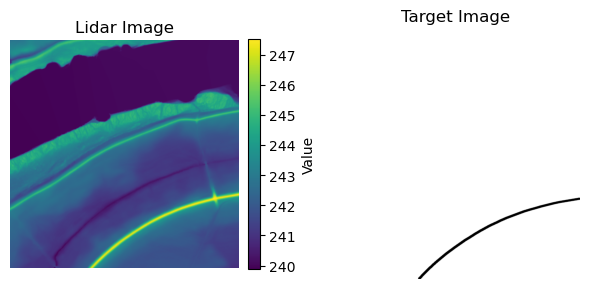

In [3]:
dataset.plot(idx=1)

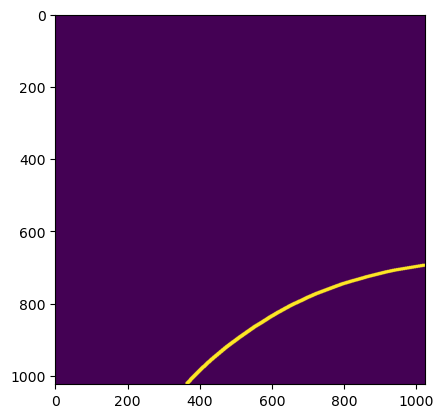

In [4]:
import matplotlib.pyplot as plt
plt.imshow(dataset[1][1].squeeze())

In [39]:
dataset.invert_masks()

Inverting masks: 100%|██████████| 102/102 [00:00<00:00, 978.00it/s]


In [5]:
data_loader = DataLoader(dataset, batch_size=10, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
import segmentation_models_pytorch as smp
import torch.optim as optim

model = smp.Segformer(
    encoder_name="mit_b0",      # Use the MIT-B0 encoder for SegFormer
    encoder_weights="imagenet", # Pretrained on ImageNet
    in_channels=1,              # Input channels (e.g. grayscale images)
    classes=1                   # Number of output classes
).to(device)


optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [7]:
# load the saved model
model.load_state_dict(torch.load("../models/1m_1024/inv_Segformer-b0.pth"))
model.eval()

Segformer(
  (encoder): MixVisionTransformerEncoder(
    (patch_embed1): OverlapPatchEmbed(
      (proj): Conv2d(1, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
      (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed2): OverlapPatchEmbed(
      (proj): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed3): OverlapPatchEmbed(
      (proj): Conv2d(64, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed4): OverlapPatchEmbed(
      (proj): Conv2d(160, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
    (block1): Sequential(
      (0): Block(
        (norm1): LayerNorm((32,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (q): Linear(in_features=

In [8]:
dataset[0]

(tensor([[[243.0054, 243.0007, 243.0126,  ..., 243.7289, 243.7219, 243.7320],
          [242.9955, 242.9943, 243.0039,  ..., 243.7421, 243.7428, 243.7585],
          [242.9815, 242.9887, 242.9969,  ..., 243.7598, 243.7595, 243.7699],
          ...,
          [241.0586, 241.0661, 241.0627,  ..., 243.7014, 243.7459, 243.8170],
          [241.1551, 241.1487, 241.1317,  ..., 243.6975, 243.7457, 243.8001],
          [241.2011, 241.1988, 241.1942,  ..., 243.7079, 243.7545, 243.7980]]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 1)

In [9]:
sample_mask

NameError: name 'sample_mask' is not defined

In [10]:
dataset.transform = 'normalize_only'

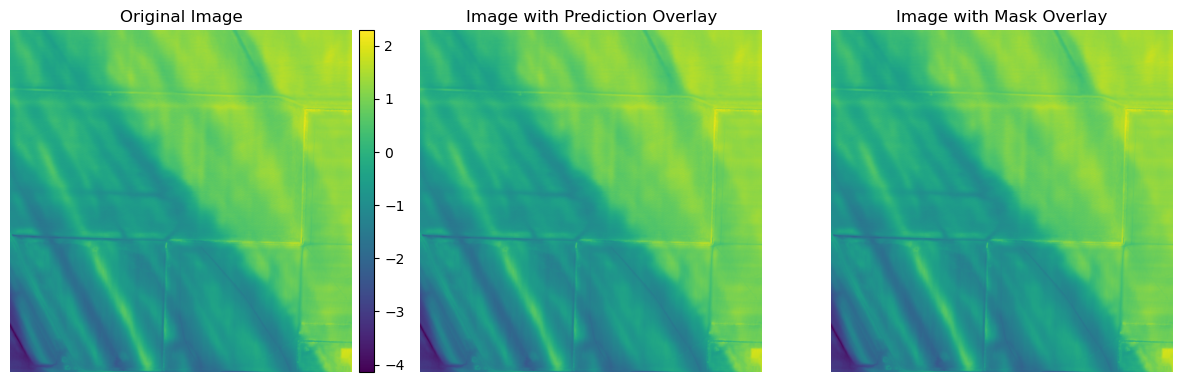

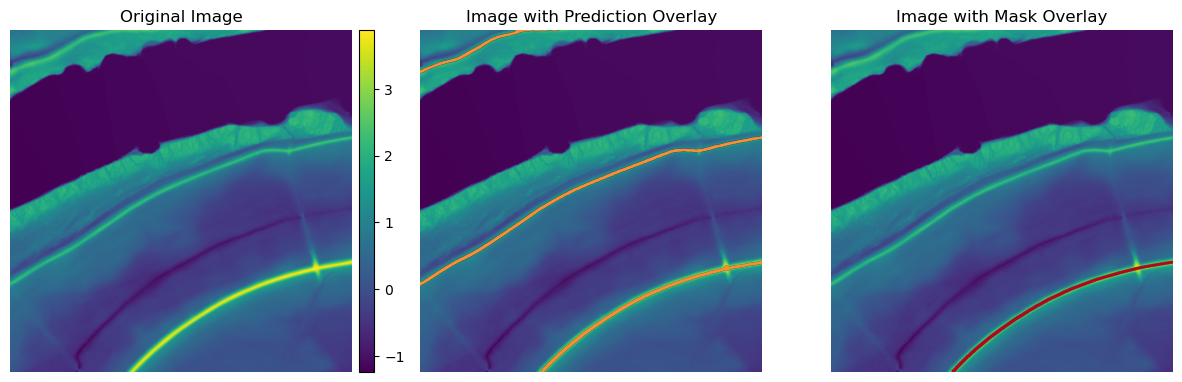

In [ ]:
from levee_hunter.plotting import plot
from levee_hunter.modeling.inference import infer
#for ix in range(len(dataset)):
for ix in range(2):
    sample_image, sample_mask, _ = dataset[ix]
    prediction = infer(model=model, image=sample_image, device=device, apply_sigmoid=True, threshold=0.5)
    plot(
        image=sample_image, 
        mask=sample_mask, 
        pred=prediction, 
        plot_types=['image', 'image_pred_overlay', 'image_mask_overlay'], 
        powernorm_threshold=30,
        inverted=False,
        )